# Answering Business Questions using SQL
## Compiled By: Dana Hagist

In this guided project, I'm going to practice using SQL skills to answer business questions. In each step, Dataquest gives a task, and I'll:

- Write a SQL query to extract the relevant data
- Create plots where necessary to visualize the data
- Write a short paragraph, drawing conclusions and explaining the data and/or visualizations.

I'll continue to use the Chinook database that I've used in earlier missions of this course. The Chinook database is provided as a SQLite database file called chinook.db. It may be necessary to consult the schema as I write the queries.

It's worth remembering that the database retains 'state', so if I run a query with a CREATE or DROP twice, the query will fail. I should have the skills to get myself untangled from these situations, but if I have trouble, or if I lock your database, Dataquest has provided a chinook-unmodified.db file that you can copy over the chinook.db to restore it back to its initial state (see this blog post on how to run shell commands within a Jupyter notebook at https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/#17executingshellcommands).

Dataquest has provided a solution notebook (accessible via the icon at the top of the interface or at https://github.com/dataquestio/solutions/blob/master/Mission191Solutions.ipynb), however Dataquest recommends only consulting this as a last resort, or when I have finished and would like to see how we they about the step. There are often several 'correct' ways to write these queries, and that the Dataquest solution notebook shows just one of these.

Here are a few tips Dataquest has provided for working on these queries:

- Write your query in stages, and run it as you go to make sure at each stage it's producing the output you expect.
- If something isn't behaving as you expect, break parts of the query out into their own, separate queries to make sure there's not an inner logic error.
- Don't be afraid to write separate queries to check the underlying data, for instance you might write a query that you can use to manually check a calculation and give yourself confidence that the output you're seeing is correct.
- If you do get stuck, don't forget your support options at https://www.dataquest.io/help/article/yJqIwwQFW9-what-support-do-i-get

### Initial Connection and Function Creation

In the SQL fundamentals course we learned how to use python's SQLite module (https://docs.python.org/3/library/sqlite3.html) and pandas to write queries that produced dataframe outputs. The advantage of dataframe outputs is that they will display as tables in Jupyter notebook. We can also take advantage of pandas plotting methods to easily create visualizations of our that displayed in tables inside our Jupyter notebook.

If you aren't familiar with pandas plotting methods, we recommend this guided project from our Data Visualization course, which teaches some of these methods. The visualization section of the pandas docs (https://pandas.pydata.org/pandas-docs/stable/visualization.html) will be useful - we encourage you to have a look and see if you can use a few plot types that you might not have already used before.

Previously, we used the sqlite3.connect() function to create a connection object, and passed that to the pandas.read_sql_query() function. In this project, we'll use a similar approach, with two important changes:

- We'll create some helper functions in python to save some time.
- We'll use a context manager to handle the connection to the SQLite database.

Context managers make our life easy by taking care of opening and closing the connection to the database, as well as making sure we don't accidentally make changes to the database if one of our queries has an error. If you're interested in learning more about context managers, we recommend this excellent article by Jeff Knupp (https://jeffknupp.com/blog/2016/03/07/python-with-context-managers/). For now, all we need to know is that we'll use the with statement to access the context manager that's built-in to the SQLite module:

with sqlite3.connect('chinook.db') as conn:

    # we can now access `conn`

    # inside an indented block

    query_result = pd.read_sql(my_query, conn)

With a few extra lines, we can turn this code into a function:

def run_query(q):

    with sqlite3.connect('chinook.db') as conn:

        return pd.read_sql(q, conn)

By returning the dataframe, we can just run our function as the last line of a Jupyter cell and it will print the results nicely for us.

We'll also create a function to run SQL queries that don't return tables, like CREATE VIEW. In this instance, we don't need to use pandas, we can simply use the SQLite module's connection.execute() method (https://docs.python.org/3/library/sqlite3.html#sqlite3.Cursor.execute):

with sqlite3.connect('chinook.db') as conn:

    conn.isolation_level = None

    conn.execute(c)

The conn.isolation_level = None line above tells SQLite to autocommit any changes - we'll talk more about that in the next mission.

Lastly, we'll make a function that uses our run_query() function to return a list of all tables and views in our databases - this is handy to quickly check the state of our database as we work. To make this easier, the query you'll need to use in this function is below:

SELECT

    name,

    type

FROM sqlite_master

WHERE type IN ("table","view");

Task:

- Import the SQLite, pandas and matplotlib modules, and use the magic command %matplotlib inline to make sure any plots render in the notebook.
- Create a run_query() function, that takes a SQL query as an argument and returns a pandas dataframe of that query.
- Create a run_command() function that takes a SQL command as an argument and executes it using the sqlite module.
- Create a show_tables() function that calls the run_query() function to return a list of all tables and views in the database.
- Run the show_tables() function.

In [2]:
# Solution (including function creation below):
import sqlite3
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [5]:
def run_command(c):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(c)

In [6]:
def show_tables():
        q = '''
        SELECT
            name,
            type
        FROM sqlite_master
        WHERE type IN ("table","view");
        '''
        return run_query(q)

In [7]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


### Analyzing Best Selling Genres in USA

The Chinook record store has just signed a deal with a new record label, and you've been tasked with selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce:

Artist Name             - Genre

Regal 	                - Hip-Hop

Red Tone 	            - Punk

Meteor and the Girls 	- Pop

Slim Jim Bites 	        - Blues

The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

You'll need to write a query to find out which genres sell the most tracks in the USA, and then create a visualization of that data using pandas.

You can run the run_query() function twice. Once at the end of a cell to display the results, and then a second time to assign the output of your to a variable name:

genre_sales_usa = run_query(q)

You can then use the DataFrame.plot() method or any of the other pandas plotting methods to produce your visualization. You can choose the sort of plot you think best communicates the data, but if you're stuck, a bar plot or horizontal bar plot will work well.

Note that if you use the DataFrame.set_index() method before you create your plot, your axis labels will be automatically added to your plot as shown in this blogpost.

Lastly, you should write up a summary of your findings, and make a recommendation for the three artists whose albums we should purchase for the store.

Task: 
- Write a query that returns each genre, with the number of tracks sold in absolute numbers and in percentages.
- Create a plot to show this data.
- Write a paragraph that interprets the data and makes a recommendation for the three artists whose albums we should purchase for the store, based on sales of tracks from their genres.


In [8]:
# Solution: 
q1 = '''
WITH usa_genre_sales AS
(
SELECT g.name genre_name, 
count(il.invoice_line_id) track_count
FROM genre g
INNER JOIN track t ON g.genre_id = t.genre_id
INNER JOIN invoice_line il ON il.track_id = t.track_id
INNER JOIN invoice i ON i.invoice_id = il.invoice_id
INNER JOIN customer c ON c.customer_id = i.customer_id
WHERE c.country='USA'
GROUP BY g.name
),
total_us_sales AS
(
SELECT sum(track_count) total_track_count
from usa_genre_sales
)

select genre_name, CAST(track_count as FLOAT) tracks_sold, CAST(track_count AS float)/total_track_count track_pct
FROM usa_genre_sales ugs, total_us_sales
GROUP BY genre_name
ORDER BY 3 desc
LIMIT 10;
'''

run_query(q1)

,genre_name,tracks_sold,track_pct
0,Rock,561.0,0.533777
1,Alternative & Punk,130.0,0.123692
2,Metal,124.0,0.117983
3,R&B/Soul,53.0,0.050428
4,Blues,36.0,0.034253
5,Alternative,35.0,0.033302
6,Latin,22.0,0.020932
7,Pop,22.0,0.020932
8,Hip Hop/Rap,20.0,0.019029
9,Jazz,14.0,0.013321


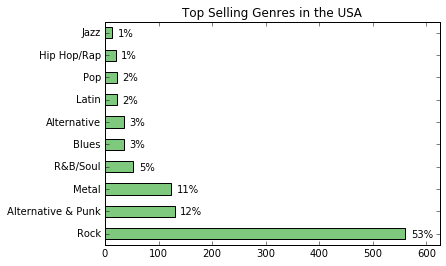

In [9]:
# Solution, cont:
usa_genre_sales = run_query(q1)
usa_genre_sales.set_index("genre_name", inplace=True, drop=True)

usa_genre_sales["tracks_sold"].plot.barh(
    title="Top Selling Genres in the USA",
    xlim=(0, 625),
    colormap=plt.cm.Accent
)

plt.ylabel('')

for i, label in enumerate(list(usa_genre_sales.index)):
    score = usa_genre_sales.loc[label, "tracks_sold"]
    label = (usa_genre_sales.loc[label, "track_pct"] * 100
            ).astype(int).astype(str) + "%"
    plt.annotate(str(label), (score + 10, i - 0.15))

plt.show()

Solution, cont: 

Based on the genres that sell the most records in the U.S., Chinook should purchase "Red Tone" (Punk), "Slim Jim Bites" (Blues) and "Meteor and the Girls" (Pop) as these would likely sell more than "Regal" (Hip Hop).  It would be worthwhile to keep a look out for other albums represented by the Rock, Alternative & Punk, and Metal categories as each one of these sells more than the genres below by double.  Rock is the highest volume category representing 53% of sales. 

### Analyzing Sales Support Agents

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. You have been asked to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

You might like to consider whether any extra columns from the employee table explain any variance you see, or whether the variance might instead be indicative of employee performance.

Task: 
- Write a query that finds the total dollar amount of sales assigned to each sales support agent within the company. Add any extra attributes for that employee that you find are relevant to the analysis.
- Create a plot of the results of your query.
- Write a short statement describing your results, and providing a possible interpretation.

In [10]:
# Solution: 
employee_performance= '''
WITH rep_cust_performance AS
(
SELECT c.support_rep_id, sum(i.total) AS total_invoiced
FROM invoice i 
INNER JOIN customer c ON c.customer_id = i.customer_id
INNER JOIN employee e ON e.employee_id = c.support_rep_id
GROUP BY 1
ORDER BY 2 DESC)

SELECT first_name||" "|| last_name emp_full_name,
total_invoiced
FROM rep_cust_performance rcp
INNER JOIN employee e on e.employee_id = rcp.support_rep_id;
'''
run_query(employee_performance)

,emp_full_name,total_invoiced
0,Jane Peacock,1731.51
1,Margaret Park,1584.00
2,Steve Johnson,1393.92


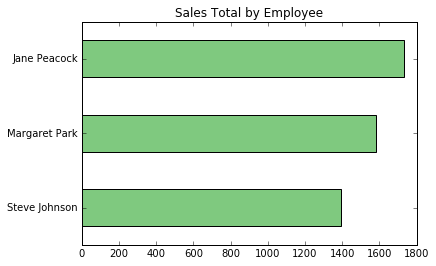

In [11]:
# Solution, cont: 
employee_sales = run_query(employee_performance)

employee_sales.set_index("emp_full_name", drop=True, inplace=True)
employee_sales.sort_values("total_invoiced", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Sales Total by Employee',
    colormap=plt.cm.Accent
)
plt.ylabel('')
plt.show()

Solution, cont:

It appears that Jane has the highest sales of all of the employees.  Jane is followed by Margaret and Steve, in that order.  Additional attributes could be brought in to understand whether this is based on hiring date, manager, region, etc.

### Analyzing Sales Data by Country

Your next task is to analyze the sales data for customers from each different country. You have been given guidance to use the country value from the customers table, and ignore the country from the billing address in the invoice table.

In particular, you have been directed to calculate data, for each country, on the:

- total number of customers
- total value of sales
- average value of sales per customer
- average order value

Because there are a number of countries with only one customer, you should group these customers as "Other" in your analysis. You can use the following 'trick' to force the ordering of "Other" to last in your analysis.

If there is a particular value that you would like to force to the top or bottom of results, you can put what would normally be your most outer query in a subquery with a case statement that adds a numeric column, and then in the outer query sort by that column. Here's an example - let's start by creating a view so we're working with a manageable number of rows:

c = '''

CREATE VIEW top_5_names AS

     SELECT

         first_name,

         count(customer_id) count

     FROM customer

     GROUP by 1

     ORDER by 2 DESC

     LIMIT 5;

'''

run_command(c)

​

q = 'SELECT * FROM top_5_names;'

run_query(q)

	first_name /	count
- 0    Frank 	/    2
- 1    Mark 	/    2
- 2    Aaron 	/    1
- 3    Alexandre /	1
- 4    Astrid 	/    1

Next, inside a subquery, we'll select all values from our view and add a sorting column using a case statement, before sorting using that new column in the outer query.

q = '''

SELECT

    first_name,

    count

FROM

    (

    SELECT

        t5.*,

        CASE

            WHEN t5.first_name = "Mark" THEN 1

            ELSE 0

        END AS sort

    FROM top_5_names t5

   )

ORDER BY sort ASC

'''

run_query(q)

	first_name /	count
- 0 	Frank  /	2
- 1 	Aaron  /	1
- 2 	Alexandre  /	1
- 3 	Astrid  /	1
- 4 	Mark  /	2

You should be able to adapt this technique into your query to force 'Other' to the bottom of your results. When working through this exercise, you will need multiple subqueries and joins. Imagine you work on a team of data analysts, and write your query so that it will be able to be easily read and understood by your colleagues.

In the next screen we'll create some visualizations and interpret the data - for now we'll just write our query.

Task: 

- Write a query that collates data on purchases from different countries. For each country, include:
    - total number of customers
    - total value of sales
    - average value of sales per customer
    - average order value
- Where a country has only one customer, collect them into an "Other" group.
- The results should be sorted by the total sales from highest to lowest, with the "Other" group at the very bottom.


In [12]:
# Solution: 
sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

run_query(sales_by_country)

,country,customers,total_sales,average_order,customer_lifetime_value
0,USA,13,1040.49,7.942672,80.037692
1,Canada,8,535.59,7.047237,66.948750
2,Brazil,5,427.68,7.011148,85.536000
3,France,5,389.07,7.781400,77.814000
4,Germany,4,334.62,8.161463,83.655000
5,Czech Republic,2,273.24,9.108000,136.620000
6,United Kingdom,3,245.52,8.768571,81.840000
7,Portugal,2,185.13,6.383793,92.565000
8,India,2,183.15,8.721429,91.575000
9,Other,15,1094.94,7.448571,72.996000


### Creating Series of Visualizations

Now that we have our data, we've been asked to create a series of visualizations which communicate our findings, and then make recommendations on which countries may have potential for growth, so the Chinook marketing team can create some new advertising campaigns.

When we're working with data that has many dimensions, it can be tempting to try and communicate every dimension in a single plot. This often results in complex and hard to read visualizations. Instead of this, we should create different plots for each dimension.

Think about the best way to communicate the data - this includes not only plot types, but how you use color, spacing and layout. As an example, you might decide to use the same color across your four plots to represent each country, so it's easier to understand the chart as a whole.

You might like to review our Storytelling Through Data Visualization course at https://www.dataquest.io/course/storytelling-data-visualization to re-familiarize yourself with some of these techniques.

Task: 
- For each dimension, create a visualization which demonstrates the data we collated in the previous step.
    - You should decide whether the "Other" group is relevant to your analysis and make decisions on where to include it (if anywhere) in your visualizations.
- Write a few sentences interpreting your data and visualizations, and make one or more recommendations to the marketing team on which countries have potential for growth.

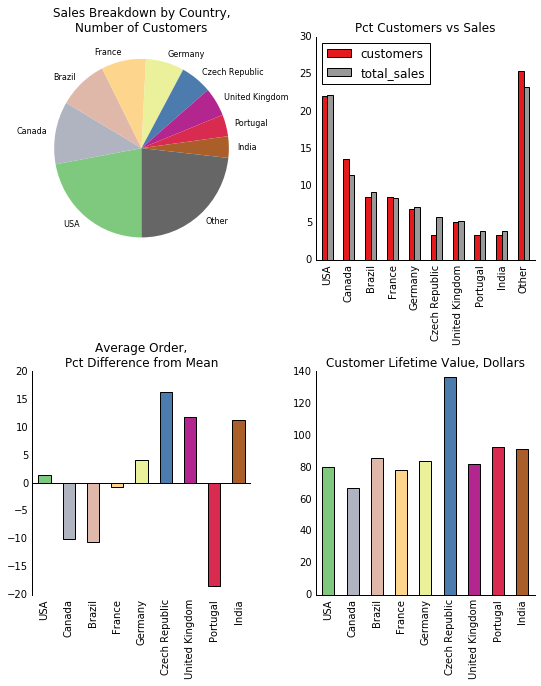

In [13]:
# Solution: 
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)


# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0}
    
)

# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

plt.show()

Solution, cont: Based on the various visualizations above, you can see that we have some room for growth in India, Portugal, United Kingdom, Czech Republic, as these all represent countries with the smallest number of customers.  One thing that can also be recognized is that Czech Republic has high measures associated with the average order compared with the mean average order, and customer lifetime value.  This might be an area where some additional attention should be focused as the marketing dollars may have a higher return on investment.  However, because we have such a small sample, it is worthwhile to do test marketing in each of these areas to see how responsive the market is to the efforts. 

The "Other" group does have some relevance to our analysis and visualizations, as it does represent a large amount of the sales.

### Understanding Album vs Individual Track Purchases


The Chinook store is setup in a way that allows customer to make purchases in one of the two ways:
- purchase a whole album
- purchase a collection of one or more individual tracks.

The store does not let customers purchase a whole album, and then add individual tracks to that same purchase (unless they do that by choosing each track manually). When customers purchase albums they are charged the same price as if they had purchased each of those tracks separately.

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to to understand the effect this decision might have on overall revenue.

It is very common when you are performing an analysis to have 'edge cases' which prevent you from getting a 100% accurate answer to your question. In this instance, we have two edge cases to consider:
- Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
- Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

In the first case, since our analysis is concerned with maximizing revenue we can safely ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second case does not happen often, so we can ignore this case also.

In order to answer the question, we're going to have to identify whether each invoice has all the tracks from an album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album. We can find the album to compare the purchase to by looking up the album that one of the purchased tracks belongs to. It doesn't matter which track we pick, since if it's an album purchase, that album will be the same for all tracks.

Up until now, we've only ever compared two single values, using operators like = != and LIKE. To compare two tables of value, we can use the EXCEPT operator that we learned in the previous mission.

You have everything you need to collate data on album vs single track purchases. This is easily the hardest query you have written so far, so take your time, and remember the query writing tips from the first screen!

Task: 
- Write a query that categorizes each invoice as either an album purchase or not, and calculates the following summary statistics:◦Number of invoices
    - Percentage of invoices

- Write one to two sentences explaining your findings, and making a prospective recommendation on whether the Chinook store should continue to buy full albums from record companies


In [14]:
# Solution: 
albums_vs_tracks = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                                     
                  EXCEPT 
                  
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase
'''

run_query(albums_vs_tracks)

,album_purchase,number_of_invoices,percent
0,no,497,0.809446
1,yes,117,0.190554


In [15]:
# Alternative Solution
albums_vs_tracks_2 = '''
WITH invoice_first_track AS 
    (
     SELECT
         il.invoice_id invoice_id,
         i.customer_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     GROUP BY 1, 2
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(COUNT(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                       ) percent
FROM
    (
    SELECT
        ifs.*,
        t.album_id,
        CASE
            WHEN
                (
                 SELECT t3.track_id FROM track t3
                 WHERE t3.album_id = t.album_id
                 
                 EXCEPT
                 
                 SELECT il2.track_id FROM invoice_line il2
                 INNER JOIN invoice i2 ON i2.invoice_id = il2.invoice_id
                 INNER JOIN track t2 ON t2.track_id = il2.track_id
                 WHERE
                         il2.invoice_id <= ifs.invoice_id
                     AND i2.customer_id = ifs.customer_id
                     AND t2.album_id = t.album_id

                ) IS NULL THEN "yes"
            ELSE "no"
        END AS "album_purchase"
    FROM invoice_first_track ifs
    INNER JOIN track t ON ifs.first_track_id = t.track_id
    )
GROUP BY 1
'''

run_query(albums_vs_tracks_2)

,album_purchase,number_of_invoices,percent
0,no,475,0.773616
1,yes,139,0.226384


In [16]:
# Dataquest Solution: 
albums_vs_tracks_3 = '''
WITH invoice_first_track AS
    (
     SELECT
         il.invoice_id invoice_id,
         MIN(il.track_id) first_track_id
     FROM invoice_line il
     GROUP BY 1
    )

SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
FROM
    (
    SELECT
        ifs.*,
        CASE
            WHEN
                 (
                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 

                  EXCEPT 

                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id
                 ) IS NULL
             AND
                 (
                  SELECT il2.track_id FROM invoice_line il2
                  WHERE il2.invoice_id = ifs.invoice_id

                  EXCEPT 

                  SELECT t.track_id FROM track t
                  WHERE t.album_id = (
                                      SELECT t2.album_id FROM track t2
                                      WHERE t2.track_id = ifs.first_track_id
                                     ) 
                 ) IS NULL
             THEN "yes"
             ELSE "no"
         END AS "album_purchase"
     FROM invoice_first_track ifs
    )
GROUP BY album_purchase;
'''

run_query(albums_vs_tracks_3)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668


Solution, cont: 

Based on the query results above, album purchases represent 18.6% of total sales.  It appears that it would make sense to continue ordering complete albums as this represents a sizable piece of revenue.  If only certain tracks were available, those who want to purchase the entire album may decide to pursue that piece of business elsewhere.

### Potential Next Steps:


In this guided project I put my SQL joining skills to the test, using subqueries, multiple joins, set operations, aggregate functions and more.

For more practice, I can look at the schema and come up with some more business questions, and then write queries to answer them. Here are a few to get me started:
- Which artist is used in the most playlists?
- How many tracks have been purchased vs not purchased?
- Is the range of tracks in the store reflective of their sales popularity?
- Do protected vs non-protected media types have an effect on popularity?

In the next mission, I'll learn more about table relations and normalization, including how to create and modify database tables.